<a href="https://colab.research.google.com/github/Sajan4072/Regression/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##linear regression for 1 feature data


In [0]:
#importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
%matplotlib inline

##Generating dummy data

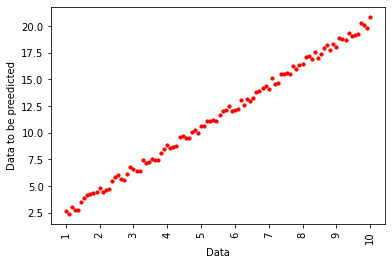

In [72]:
#data generation 
x=np.linspace(1,10,100)
y= x*2 + np.random.rand(100)


#labelling the axes along the axis spines
plt.ylabel('Data to be preedicted')
plt.xlabel('Data')
plt.xticks(np.arange(1,11),rotation=90)

#scatter plot of the dummy data 
plt.scatter(x,y,color='r',s=10)


##Build a model to fit the data
We can see the data folloes a somewhat a linear path. So we use linear regression to predict y_value based on x_value.

In [0]:
#the amount by which our data may lie off from the fitted line
errors=y-x*2 #can visualize using a bar chart  

In [0]:
#import LinearRegression(which fits a linear model with coefficients ws to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation)
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)


Now, we split the data into our training set and test set to check the accuracy of predictive power of our model.

In [0]:
x_train=x[:70].reshape(-1,1) #convert our data from 1D to 2D
y_train=y[:70]

x_test=x[70:].reshape(-1,1)
y_test=y[70:]

train our linear regression model

In [76]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_pred contains value that the model predicts in place of y_test

In [0]:
y_pred=reg.predict(x_test)

To see the model we,ve built by extracting the weight(slope) and bias(intercept) that the model learnt form our data .

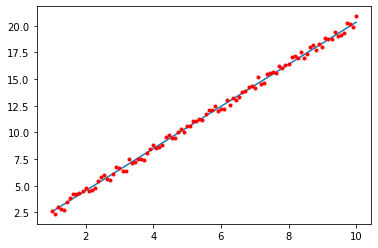

In [78]:
weight = reg.coef_
bias=reg.intercept_
plt.plot(x,bias+weight*x,x,y,'r.')

In [79]:
#the model that we created is a bunch of weights assigned to our input variable
weight

array([1.97383471])

To see how well our model predicted the data, we use a simple metric called sum of squares(MSE) to figure out the relative error of our model.

In [80]:
MSE=(sum((y_pred-y_test)**2))/len(y_test)
print("Mean Sum of squares:",MSE)

#alternate is use the library funtion 
from sklearn.metrics import mean_squared_error
print("MSE using library function:",mean_squared_error(y_test,y_pred))

Mean Sum of squares: 0.09156978434380267
MSE using library function: 0.09156978434380267


##Boston housing data set

This housing data set contains multiple features so that the model should work with multiple regression coefficients and also deal with multicollinearity.

In [0]:
#import the module scikit-learn
import sklearn as sk 

In [0]:
#import the housing dataset from sklearn 
from sklearn.datasets import load_boston

print the description attribute that sklearn provides

In [83]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
housing=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
target=load_boston().target

In [0]:
housing=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
housing['target']=load_boston().target
targets=load_boston().target

In [88]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To visualize and learn more about the data we will use seaborn which is built on top of matplotlib. But before that,we attempt to analyze the data.

In [89]:
#establish preliminary correlations
pearson_corr=housing.corr(method='pearson')
corr_target=pearson_corr.iloc[-1][:-1].sort_values(ascending=False)
corr_target

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [90]:
corr_target[abs(corr_target).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [0]:
#correlation between features
corr_without_target = pearson_corr.iloc[:-1,:-1]
# threshold = 0.5 # correlations smaller than this aren't recorded

# significant_corr = dict()

# for rows in corr_without_target.keys():
#   for cols in corr_without_target[rows].keys():
#     if((rows is not cols) and (corr_without_target[rows][cols] >= threshold)):
#       significant_corr[rows,cols] = corr_without_target[rows][cols]
# print(significant_corr)


In [92]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


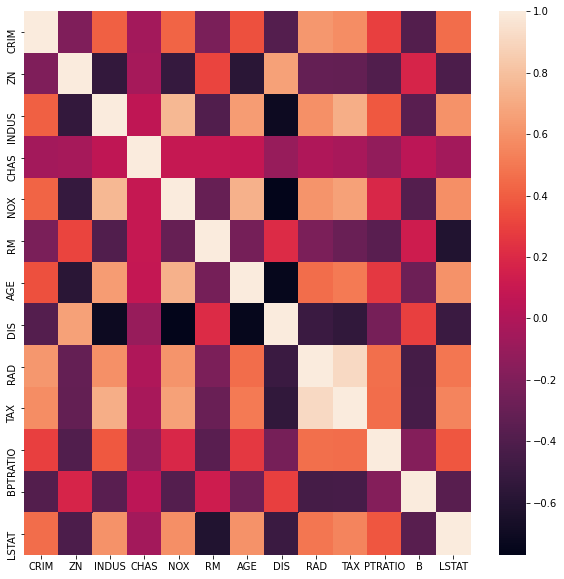

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_without_target,ax=ax)

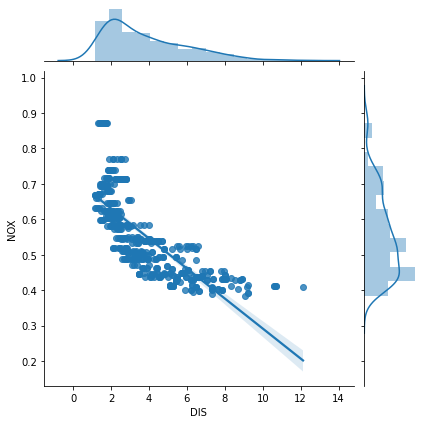

In [94]:
sns.jointplot(housing.DIS, housing.NOX, kind='reg')

When the data contains features that are highly correlated, better results will be produced if those correlations are controlled for by proper feature selection. Ideally, we would want completely independent features to build our model.

In [0]:
#function to split the data 
from sklearn.model_selection import train_test_split

In [0]:
housing_without_targets = housing.drop('target',axis=1)
X_train, X_test, y_train, y_test = \
    train_test_split(housing_without_targets, targets, test_size = 0.3, random_state = 1)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg= LinearRegression(fit_intercept=True)

In [101]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = reg.predict(X_test)

In [0]:
#check the error in our model prediction
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
print("mean squared error with LinearRegressor(): \n",mean_squared_error(y_test, y_pred),
      "\nOur model explains {:.1f}".format(
r2_score(y_test,y_pred)*100)+"% of our data")

mean squared error with LinearRegressor(): 
 19.831323672062922 
Our model explains 78.4% of our data


##Overfitting and underfitting

While building a model, it is important to check whether the model performs well. This means that the model must be able to generalize beyond the present training data. To do this, the model must capture the actual structure of the data well enough. It must be able to ignore the noise in the data



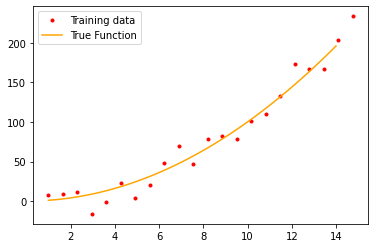

In [106]:
# for a function f(x):
def f(x):
  """This is the true function. This is what the model must predict.
  The rest is just noise that the model must ignore.
  You may try out different functions with Range(1,20).
  Change the returned expression to any other polynomial function."""
  return x**2
# let's understand this problem with a trivial dataset
# create a random dataset that would fit to a polynomial regressor
X = np.linspace(1,20,30)
y = f(X) + 15*np.random.randn(30)

# split the train and test data

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=False)

# plot the data
plt.plot(X_train,y_train,'r.',label = 'Training data')
#True function plot
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()

##underfitting

In [0]:
reg = LinearRegression(fit_intercept=True)

In [108]:
#fit linearregression 
reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'MSE on train: 451.6078086464484\nMSE on test: 6717.384953961113')

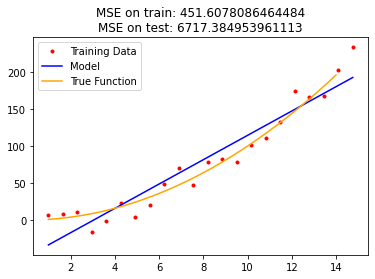

In [109]:
# data that the model predicts
y_pred = reg.predict(X_test.reshape(-1,1))

# plotting the model
# data looks like this
plt.plot(X_train,y_train,'r.',label = 'Training Data')

# our fitted line in 2D looks like this
plt.plot(X_train,reg.predict(X_train.reshape(-1,1)),label='Model',c='blue')
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()
plt.title(
    label = "MSE on train: {}".format(mean_squared_error(y_train,reg.predict(X_train.reshape(-1,1)))) + 
    "\nMSE on test: {}".format(mean_squared_error(y_test,y_pred))
)

## more refrence on [scikit_learn ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
[overfitting and underfitting](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)